Bernoulli Data

In [1]:
import numpy as np

# Set the probability of success (p) for the Bernoulli distribution
probability = 0.5  # You can change this probability as needed

# Generate a 2x5 matrix of Bernoulli-distributed data
rows, cols = 100, 3  # Number of rows and columns in the matrix
bernoulli_data_2d = np.random.binomial(1, probability, size=(rows, cols))

print("Generated 2D Bernoulli-distributed data:")
print(bernoulli_data_2d)

Generated 2D Bernoulli-distributed data:
[[0 0 1]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [0 0 0]
 [1 0 1]
 [0 1 1]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 1]
 [0 1 1]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 0 1]
 [1 0 0]
 [1 1 1]
 [0 1 1]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [1 1 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 1]
 [0 1 1]
 [0 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 0]
 [1 0 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 1]
 [0 0 1]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 1 0]
 [0 1 0]]


In [2]:
import numpy as np

class pca_exponent:

    def __init__(self, distribution, data, num_components, max_iterations):
        self.distribution = distribution
        self.data = data
        self.components = num_components
        self.max_iterations = max_iterations

    def F_normal(self, x):
        return (x ** 2) / 2

    def f_normal(self, x):
        return x

    def F_poisson(self, x):
         t = np.clip(np.multiply(x, np.log(x, where=(x > 0))) - x, -1000, 1000)
         return np.where(x > 0, t, 0)

    def f_poisson(self, x):
        return np.log(x)
    
    def F_bernoulli(self, x):
        if x == 0 or x == 1:
            return 0
        else:
            return x * np.log(x) + (1 - x) * np.log(1 - x)
    
    def f_bernoulli(self, x):
        
        return np.log(x / (1 - x))

    def calculate_deri(self, S, A, V):
        if self.distribution == 'normal':
            return A*V + S
        elif self.distribution == 'poisson':
            
            return np.exp(np.dot(A, V) + S)
        
        elif self.distribution=='bernoulli':
            x = np.dot(A, V) + S
            return np.exp(x) / (1 + np.exp(x))

    def Bregmann(self, p, S, A, V):
        q = self.calculate_deri(S, A, V)
        if self.distribution == 'normal':
            
            dist = self.F_normal(p) - self.F_normal(q) - np.multiply(self.f_normal(q), (p - q))
        elif self.distribution == 'poisson':
            dist = self.F_poisson(p) - self.F_poisson(q) - np.multiply(self.f_poisson(q), (p - q))
        elif self.distribution == 'bernoulli':
            theta = np.dot(A, V) + S
            dist = np.log(1 + np.exp(-(2 * p - 1) * theta))
        return dist
    
    def fit(self):
        n, d = self.data.shape
        np.random.seed()
        self.A=np.zeros((n,self.components))
        store_A = []
        self.v = np.random.randn(self.components,d)
       
        for c in range(self.components):  
            self.v[c] = np.round(np.random.randn(d),4)
            self.A[:,c]= np.random.randn(n)
            for iteration in range(self.max_iterations):
                old=self.A.copy()
                for i2 in range(n):
                    overallsum=[]
                    for a_loop in range(n):
                        t=[]
                        for j2 in range(self.data.shape[1]):

                            S = 0
                            for l in range(self.components):
                                if l != c:
                                    S = S + self.A[i2][l] * self.v[l][j2]
                            t.append(self.Bregmann(self.data[i2][j2], S, self.A[a_loop][c], self.v[c][j2]))
                        listval=sum(t)
                        overallsum.append(listval)
                    min_value = min(overallsum)
                    min_index = overallsum.index(min_value)
                    
                    self.A[i2,c] = self.A[min_index,c]
                res=np.array_equal(old, self.A)
                for i2 in range(self.data.shape[1]):
                    overallsum=[]
                    for v_loop in range(d):
                        t=[]
                        for j2 in range(n):
                            #TAKING S VALUES AS CONTRIBUTION OF REMAINING FIXED COMPONENTS
                            S = 0
                            for l in range(self.components):
                                if l != c:
                                    S = S + self.A[j2][l] * self.v[l][i2]
                            t.append(self.Bregmann(self.data[j2][i2], S, self.A[j2][c], self.v[c][v_loop]))
                        listval=sum(t)
                        overallsum.append(listval)
                    min_value = min(overallsum)
                    min_index = overallsum.index(min_value)
                    self.v[c,i2]=self.v[c,min_index]      
                res=np.array_equal(old, self.A)  
                if res == False:
                    k = self.A.copy()
                    store_A.append(k)
        
        return self.A, self.v, store_A

In [3]:
low_dim = pca_exponent('bernoulli', bernoulli_data_2d, 2,40)
A, V, store_A = low_dim.fit()

In [4]:
A

array([[ 0.94279589, -2.04036024],
       [-0.95450657,  2.08569977],
       [-0.95450657,  2.08569977],
       [-0.95450657, -2.04036024],
       [-0.95450657, -2.04036024],
       [ 0.1788206 ,  2.08569977],
       [-0.95450657, -2.04036024],
       [ 0.94279589,  2.08569977],
       [ 2.91845302, -2.04036024],
       [-0.95450657, -2.04036024],
       [ 0.1788206 ,  2.08569977],
       [ 0.94279589,  2.08569977],
       [-0.95450657,  2.08569977],
       [ 0.94279589,  2.08569977],
       [-1.87121882,  2.08569977],
       [ 0.94279589,  2.08569977],
       [ 2.91845302, -2.04036024],
       [-1.87121882,  2.08569977],
       [ 2.91845302, -2.04036024],
       [ 0.94279589,  2.08569977],
       [-0.95450657,  2.08569977],
       [ 0.1788206 ,  2.08569977],
       [ 0.1788206 ,  2.08569977],
       [ 0.94279589, -2.04036024],
       [ 0.1788206 ,  2.08569977],
       [-0.95450657,  2.08569977],
       [ 0.94279589,  2.08569977],
       [-0.95450657,  2.08569977],
       [-0.95450657,

In [5]:
len(store_A)

3

In [6]:
print(store_A)

[array([[ 0.7953698 ,  0.        ],
       [-0.81661403,  0.        ],
       [-0.81661403,  0.        ],
       [-0.95450657,  0.        ],
       [-0.95450657,  0.        ],
       [ 0.1788206 ,  0.        ],
       [-0.95450657,  0.        ],
       [ 0.94279589,  0.        ],
       [ 2.91845302,  0.        ],
       [-0.95450657,  0.        ],
       [ 0.1788206 ,  0.        ],
       [ 0.94279589,  0.        ],
       [-0.81661403,  0.        ],
       [ 0.94279589,  0.        ],
       [-1.87121882,  0.        ],
       [ 0.94279589,  0.        ],
       [ 2.91845302,  0.        ],
       [-1.87121882,  0.        ],
       [ 2.91845302,  0.        ],
       [ 0.94279589,  0.        ],
       [-0.81661403,  0.        ],
       [ 0.1788206 ,  0.        ],
       [ 0.1788206 ,  0.        ],
       [ 0.7953698 ,  0.        ],
       [ 0.1788206 ,  0.        ],
       [-0.81661403,  0.        ],
       [ 0.94279589,  0.        ],
       [-0.81661403,  0.        ],
       [-0.95450657

In [7]:
V

array([[-2.2679, -0.7454, -0.7454],
       [-0.0023,  0.7998, -0.0023]])

In [8]:
bernoulli_data_2d - np.dot(A, V)

array([[ 2.13347397,  2.33464017,  1.69806723],
       [-1.15992833, -1.37963187, -0.70669209],
       [-1.15992833, -1.37963187, -0.70669209],
       [-1.16941827,  0.92039092,  0.28381798],
       [-1.16941827,  0.92039092,  0.28381798],
       [ 0.41034436, -0.53484979,  1.13808999],
       [-1.16941827,  0.92039092,  0.28381798],
       [ 2.1429639 ,  0.03461738,  0.70755716],
       [ 6.61406678,  3.807295  ,  2.17072205],
       [-1.16941827,  0.92039092,  0.28381798],
       [ 0.41034436, -0.53484979,  1.13808999],
       [ 2.1429639 ,  0.03461738,  0.70755716],
       [-1.15992833, -1.37963187, -0.70669209],
       [ 2.1429639 ,  0.03461738,  0.70755716],
       [-3.23894004, -2.06294918, -0.3900094 ],
       [ 2.1429639 ,  0.03461738,  0.70755716],
       [ 6.61406678,  3.807295  ,  2.17072205],
       [-3.23894004, -2.06294918, -0.3900094 ],
       [ 6.61406678,  3.807295  ,  2.17072205],
       [ 2.1429639 ,  0.03461738,  0.70755716],
       [-1.15992833, -1.37963187, -0.706

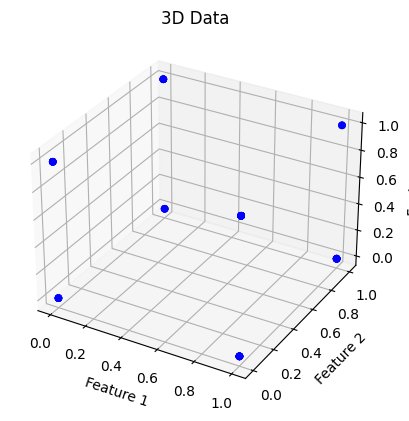

In [9]:
# 3D Scatter Plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(bernoulli_data_2d [:, 0], bernoulli_data_2d[:, 1], bernoulli_data_2d [:, 2], c='b', marker='o')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set title
ax.set_title('3D Data')
plt.show()

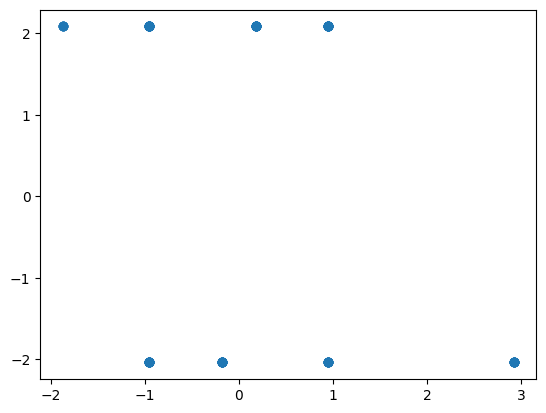

In [10]:
plt.scatter(A[:, 0], A[:, 1])

lARGER DIM

In [11]:
import numpy as np

# Set the probability of success (p) for the Bernoulli distribution
probability = 0.5  # You can change this probability as needed

# Generate a 2x5 matrix of Bernoulli-distributed data
rows, cols = 100, 9  # Number of rows and columns in the matrix
bernoulli_data_2d_LARGE = np.random.binomial(1, probability, size=(rows, cols))

print("Generated 2D Bernoulli-distributed data:")
print(bernoulli_data_2d_LARGE)

Generated 2D Bernoulli-distributed data:
[[1 0 1 1 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0]
 [0 1 1 1 0 0 1 1 1]
 [0 0 0 1 0 1 0 0 1]
 [0 0 0 1 0 0 1 0 0]
 [1 1 1 0 1 0 0 0 1]
 [0 0 1 0 0 1 1 1 1]
 [1 1 0 0 0 1 0 1 1]
 [1 0 1 1 1 0 0 1 1]
 [0 0 1 0 0 1 0 1 0]
 [1 1 0 0 0 1 0 1 0]
 [0 1 0 1 1 0 0 0 0]
 [0 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 0 0 1 0]
 [1 0 0 1 1 1 0 0 1]
 [1 0 1 0 1 0 1 1 1]
 [0 0 0 1 0 0 1 0 0]
 [1 0 0 0 1 1 1 1 1]
 [0 0 1 1 0 0 0 0 1]
 [1 1 0 1 0 1 1 1 1]
 [0 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 1 1 1 1]
 [1 0 1 0 0 1 1 1 0]
 [1 1 0 0 0 0 1 1 1]
 [1 1 1 0 1 0 0 0 0]
 [1 1 1 0 0 1 1 1 1]
 [1 0 0 0 1 1 1 1 0]
 [0 0 1 0 0 1 0 1 0]
 [1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 1]
 [0 1 1 1 0 0 1 0 1]
 [0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 1 1]
 [0 1 0 1 1 1 0 1 0]
 [0 1 0 0 1 0 0 1 1]
 [1 1 0 1 0 1 1 0 0]
 [0 0 1 0 1 1 0 0 1]
 [0 1 0 0 0 1 0 0 1]
 [1 0 1 1 0 1 1 0 1]
 [1 0 1 0 1 1 0 1 0]
 [1 0 1 0 0 1 1 1 0]
 [0 1 0 1 0 0 0 1 0]
 [0 1 0 1 1 1 

In [12]:
low_dim = pca_exponent('bernoulli', bernoulli_data_2d_LARGE, 3,40)
A_large_bernoulli, V_large_bernoulli, store_A_large = low_dim.fit()

KeyboardInterrupt: 

In [ ]:
print(A_large_bernoulli)

[[-1.07478307e-01  9.20202899e-01 -1.02327672e+00]
 [-5.53962035e-01 -2.97665139e-01  1.05049417e+00]
 [ 4.80682230e-02 -1.57819811e+00  1.95289921e+00]
 [ 1.44982487e+00 -2.09510828e+00  1.35122973e+00]
 [ 1.72004357e+00 -1.57819811e+00 -1.66918556e+00]
 [ 5.33699273e-01 -2.09510828e+00  1.06157443e+00]
 [ 1.31430953e-01 -2.09510828e+00 -2.02581082e-01]
 [ 5.33699273e-01 -2.09510828e+00  1.06157443e+00]
 [-2.57988098e-01 -2.97665139e-01 -2.09319927e+00]
 [ 1.51204856e+00 -2.97665139e-01 -2.09319927e+00]
 [ 3.35769569e-01 -2.97665139e-01 -2.02581082e-01]
 [-2.31932208e+00 -5.76019424e-01  2.45099308e+00]
 [-7.21500427e-01 -5.76019424e-01  5.12259254e-01]
 [-8.17052075e-01 -2.09510828e+00 -7.10635787e-01]
 [-8.29335304e-01 -1.45374535e-01  2.45099308e+00]
 [ 9.91474855e-01 -1.17015549e+00  2.45099308e+00]
 [-1.09807975e+00  1.29770504e+00  1.35122973e+00]
 [ 2.26598212e-01 -3.90418680e-01 -2.09319927e+00]
 [-7.21500427e-01  2.12846690e+00 -5.60485700e-01]
 [-7.21500427e-01 -5.76019424e-

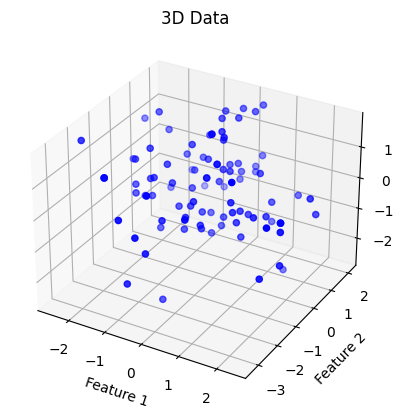

In [ ]:
# 3D Scatter Plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(A_large_bernoulli [:, 0], A_large_bernoulli[:, 1], A_large_bernoulli[:, 2], c='b', marker='o')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set title
plt.savefig(f'3d_data_ber.png')
ax.set_title('3D Data')
plt.show()

In [13]:
plt.scatter(A_large_bernoulli [:, 0], A_large_bernoulli [:, 1])
plt.savefig(f'2d_data_ber.png')
plt.xlabel("pc - 1")
plt.ylabel("pc - 2")

NameError: name 'A_large_bernoulli' is not defined

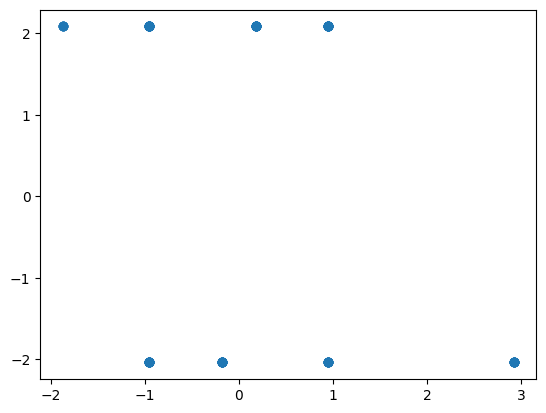

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Function to update the 3D plot for each iteration
def update(frame):
    plt.cla()  # Clear the previous frame
    
    # Replace this with your actual data for each iteration
    # Assuming store_A is a list of 3D points (x, y, z)
    points = store_A[frame]
    
    plt.scatter(points[:, 0], points[:, 1])

# Create a figure and 3D axis
fig = plt.figure()
#ax = fig.add_subplot(111, projection='2d')

# Set the number of iterations
num_iterations = len(store_A)

# Create an animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=1000)

# Save each frame as an image
for i in range(num_iterations):
    update(i)  # Update the plot for each iteration
    plt.savefig(f'iteration_{i + 1}.png')

plt.show()


In [15]:
# Visualization of large

NameError: name 'store_A_large' is not defined

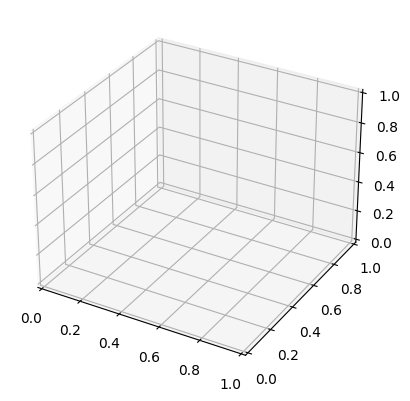

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Function to update the 3D plot for each iteration
def update(frame):
    ax.cla()  # Clear the previous frame
    
    # Replace this with your actual data for each iteration
    # Assuming store_A is a list of 3D points (x, y, z)
    points = store_A_large[frame]
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    #ax.set_title(f'Iteration {frame + 1}')
    ax.set_xlabel('pc-1')
    ax.set_ylabel('pc-2')
    ax.set_zlabel('pc-3')

    #ax.tight_layout()

# Create a figure and 3D axis


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the number of iterations
num_iterations = len(store_A_large)
print(num_iterations)
# Create an animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=1000)

# Save each frame as an image
for i in range(num_iterations):
    update(i)  # Update the plot for each iteration
    plt.savefig(f'iteration_{i + 1}.png')

plt.show()


POISSON DISTRIBUTION

Generated Poisson data:
[[483 495 490 500 477 501 476 470 472]
 [507 512 505 476 538 484 491 508 489]
 [469 462 503 532 546 467 536 502 494]
 [516 480 463 515 506 487 483 511 529]
 [529 472 509 492 496 505 495 513 507]
 [483 511 504 508 487 476 537 514 492]
 [505 470 508 514 471 488 495 499 498]
 [528 526 540 495 491 495 490 515 515]
 [485 479 516 496 489 489 526 491 508]
 [493 490 481 528 540 528 476 504 528]
 [521 521 476 466 463 494 470 501 506]
 [494 475 475 505 473 490 489 469 496]
 [508 503 494 487 536 489 520 475 531]
 [495 510 505 502 534 470 477 484 500]
 [512 500 484 509 518 546 484 508 505]
 [463 527 472 492 499 505 483 513 469]
 [473 486 525 498 504 493 532 499 520]
 [489 483 528 523 527 501 479 479 542]
 [523 513 519 513 477 489 528 512 500]
 [500 523 506 509 485 504 517 526 518]
 [479 496 477 487 468 524 520 506 520]
 [486 469 491 525 520 471 513 526 521]
 [481 465 482 470 503 521 504 526 496]
 [507 471 502 497 486 495 478 470 526]
 [512 481 470 462 489 511 500 501 537]
 

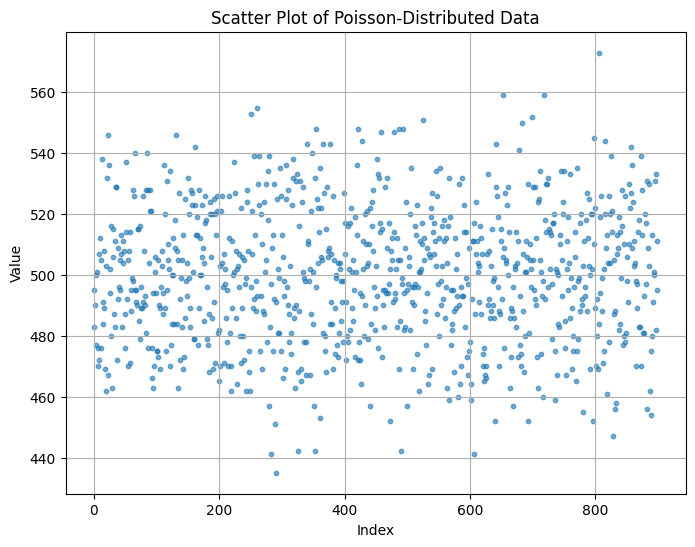

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mean = 500 # Higher mean for increased spread
size = (100, 9)  # Desired dimensions of the generated data

# Generate data from a Poisson distribution
poisson_data = np.random.poisson(mean, size=size)

# Display the generated data
print("Generated Poisson data:")
print(poisson_data)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot of Poisson-Distributed Data")
plt.scatter(range(size[0] * size[1]), poisson_data.flatten(), s=10, alpha=0.6)
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Generated Poisson data:
[[49 52 56]
 [53 55 49]
 [44 53 45]
 [40 42 49]
 [47 38 47]
 [57 62 46]
 [62 44 56]
 [48 57 60]
 [47 49 37]
 [45 50 50]
 [61 52 52]
 [66 50 52]
 [47 41 46]
 [61 47 46]
 [37 53 41]
 [52 48 52]
 [44 46 62]
 [58 49 38]
 [55 54 47]
 [35 52 55]
 [50 38 50]
 [40 50 54]
 [46 53 65]
 [44 62 51]
 [39 47 50]
 [59 62 55]
 [42 42 49]
 [62 59 42]
 [41 46 50]
 [60 51 45]
 [45 45 38]
 [45 47 60]
 [50 50 38]
 [51 50 47]
 [52 39 53]
 [58 50 54]
 [40 42 53]
 [67 42 50]
 [53 44 49]
 [47 46 48]
 [54 47 54]
 [50 54 39]
 [39 40 56]
 [44 53 45]
 [57 60 48]
 [53 57 53]
 [48 52 49]
 [51 56 39]
 [40 53 49]
 [56 51 43]
 [45 49 59]
 [38 38 48]
 [50 46 49]
 [48 43 51]
 [43 47 60]
 [49 61 45]
 [43 52 51]
 [41 44 47]
 [52 60 48]
 [59 40 51]
 [69 50 43]
 [46 55 48]
 [47 46 58]
 [53 47 47]
 [49 53 57]
 [44 48 56]
 [50 59 43]
 [57 49 62]
 [51 55 47]
 [47 54 56]
 [50 50 58]
 [51 56 53]
 [56 61 52]
 [57 48 47]
 [51 49 57]
 [55 53 71]
 [61 44 47]
 [55 54 54]
 [47 50 38]
 [43 53 53]
 [42 59 48]
 [54

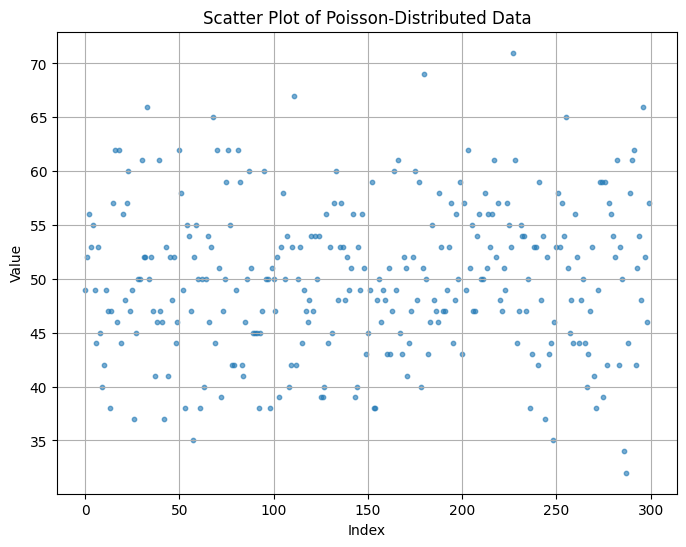

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mean = 50 # Higher mean for increased spread
size = (100, 3)  # Desired dimensions of the generated data

# Generate data from a Poisson distribution
poisson_data_1 = np.random.poisson(mean, size=size)

# Display the generated data
print("Generated Poisson data:")
print(poisson_data_1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot of Poisson-Distributed Data")
plt.scatter(range(size[0] * size[1]), poisson_data_1.flatten(), s=10, alpha=0.6)
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [19]:
import numpy as np

class pca_exponent:
    def __init__(self, distribution, data, num_components, max_iterations):
        self.distribution = distribution
        self.data = data
        self.components = num_components
        self.max_iterations = max_iterations

    def F_normal(self, x):
        return (x ** 2) / 2

    def f_normal(self, x):
        return x

    def F_poisson(self, x):
         t = np.clip(np.multiply(x, np.log(x, where=(x > 0))) - x, -1000, 1000)
         return np.where(x > 0, t, 0)

    def f_poisson(self, x):
        return np.log(x)
    
    def F_bernoulli(self, x):
        if x == 0 or x == 1:
            return 0
        else:
            return x * np.log(x) + (1 - x) * np.log(1 - x)
    
    def f_bernoulli(self, x):
        
        return np.log(x / (1 - x))
        #return 0

    def calculate_deri(self, S, A, V):
        #print("S",S)
        #print("A",A)
        #print("V",V)
        if self.distribution == 'normal':
            #print("deri value of normal",np.dot(A, V))
            return A*V + S
        elif self.distribution == 'poisson':
            
            return np.exp(np.dot(A, V) + S)
        
        elif self.distribution=='bernoulli':
            x = np.dot(A, V) + S
            return np.exp(x) / (1 + np.exp(x))

    def Bregmann(self, p, S, A, V):
        #print("s", S)
        #print("a", A)
        #print("v", V)
        theta = np.dot(A, V) + S
        q = self.calculate_deri(S, A, V)
        #print("g value in bregman",q)
        #print("data point in bregmann",p)
        if self.distribution == 'normal':
            #print("p and q",p,q)
            
            #dist = self.F_normal(p) - self.F_normal(q) - np.multiply(self.f_normal(q), (p - q))
            dist=(p-theta)**2/2
        elif self.distribution == 'poisson':
            #dist = self.F_poisson(p) - self.F_poisson(q) - np.multiply(self.f_poisson(q), (p - q))
            #print(p)
            dist=np.exp(theta)-p*theta+p*np.log(p)-p
        elif self.distribution == 'bernoulli':
            theta = np.dot(A, V) + S
            #print("p",p)
            dist = np.log(1 + np.exp(-(2 * p - 1) * theta))
            #dist = self.F_bernoulli(p) - self.F_bernoulli(q) - np.multiply(self.f_bernoulli(q), (p - q))

        #print(dist)
        return dist
    def fit(self):

       
        n, d = self.data.shape
        #self.A = np.zeros((n, self.components))  # Set 5 as the number of components
        np.random.seed()
       
        self.A = np.random.randn(n, self.components)
        #print("defined A",self.A)
        prev=self.A

        store = []

        self.v = np.random.randn(self.components,d)
   
        self.v= np.round(np.random.uniform(0, 10, (self.components,d)),4)
        for c in range(self.components):  # Change to 5 components
            #self.v[c] = np.round(np.random.uniform(0, 10, d),4)
            self.v[c] = np.round(np.random.randn(d),4)
            #self.A[:,c]=np.round(np.random.randn(n),4)
            self.A[:,c]= np.random.uniform(0,10,size=n)
           
            for iteration in range(self.max_iterations):
                
                old=self.A.copy()
                for i2 in range(n):
                   
                    overallsum=[]
                    for a_loop in range(n):
                        t=[]
                        for j2 in range(self.data.shape[1]):

                            S = 0
                            for l in range(self.components):
                                #print("above if")
                                if l != c:
                                    
                                    S = S + self.A[i2][l] * self.v[l][j2]
                     
                            t.append(self.Bregmann(self.data[i2][j2], S, self.A[a_loop][c], self.v[c][j2]))
                    
                        listval=sum(t)
                        overallsum.append(listval)
                    min_value = min(overallsum)
                    min_index = overallsum.index(min_value)
                    
                    self.A[i2,c] = self.A[min_index,c]
                        

                #print( "after changing")
                #print(self.A)
                res=np.array_equal(old, self.A)
                #print(res)
                prev = self.A
                for i2 in range(self.data.shape[1]):
                    #print("data.shape[1]",self.data.shape[1])
                    overallsum=[]
                    for v_loop in range(d):
                        t=[]
                        for j2 in range(n):
                            #TAKING S VALUES AS CONTRIBUTION OF REMAINING FIXED COMPONENTS
                            S = 0
                            #print("components",self.components)
                            for l in range(self.components):
                                if l != c:
                                    S = S + self.A[j2][l] * self.v[l][i2]
                            #print("s in v",S)
                            #print("i2 and j2",i2,j2)
                            #print(self.Bregmann(self.data[i2][j2], S, self.A[:,c], self.v[i2][j2]))
                            t.append(self.Bregmann(self.data[j2][i2], S, self.A[j2][c], self.v[c][v_loop]))
                        listval=sum(t)
                        overallsum.append(listval)
                    min_value = min(overallsum)
                    min_index = overallsum.index(min_value)
                    self.v[c,i2]=self.v[c,min_index]
                res=np.array_equal(old, self.A)
                if res:
                    pass
                else:
                    store.append(self.A.copy())
                #print("self.A,",self.A)
                #print(res)        
              
            
                

        return self.A, self.v, store

In [20]:
low_dim = pca_exponent('poisson', poisson_data, 2,40)
A_poisson_large_3d, V_poisson_large_3d, store_poisson_large_3d = low_dim.fit()

KeyboardInterrupt: 

In [ ]:
low_dim = pca_exponent('poisson', poisson_data, 3,40)
A_poisson_large, V_poisson_large, store_poisson_large = low_dim.fit()

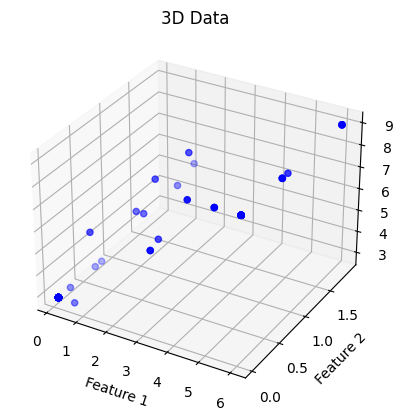

In [164]:
# 3D Scatter Plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(A_poisson_large [:, 0], A_poisson_large[:, 1], A_poisson_large[:, 2], c='b', marker='o')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set title
ax.set_title('3D Data')
plt.savefig(f'3d_data.png')
plt.show()

In [163]:
plt.savefig(f'3d_data.png')

<Figure size 640x480 with 0 Axes>

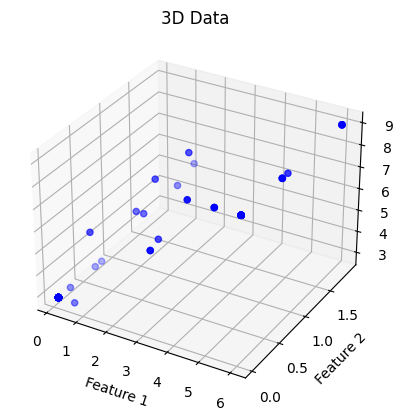

In [107]:
# 3D Scatter Plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(A_poisson_large [:, 0], A_poisson_large[:, 1], A_poisson_large[:, 2], c='b', marker='o')

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set title
ax.set_title('3D Data')
plt.show()

In [150]:
A_poisson_large_3d.shape

(100, 2)

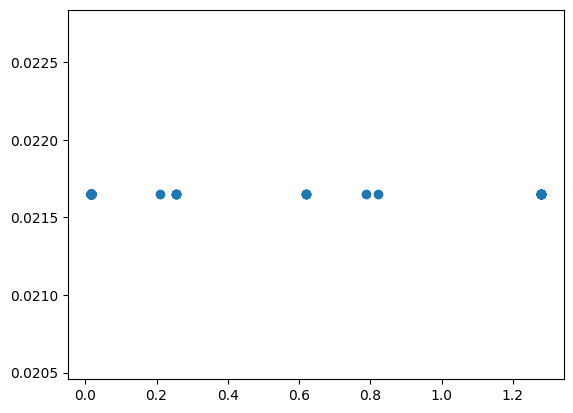

In [161]:
plt.scatter(A_poisson_large_3d[:,0], A_poisson_large_3d[:,1])
plt.savefig(f'2d_data.png')

In [108]:
store_poisson

[array([[ 2.68627796, -0.75901602,  0.08716807],
        [ 2.49672108, -0.28565983, -1.03190349],
        [ 3.12782924, -0.93242897,  0.13108183],
        [ 1.30058905, -0.15603958,  0.30089665],
        [ 0.77998679,  1.06807751, -1.2935633 ],
        [ 2.16535181, -0.407795  ,  0.3317351 ],
        [ 0.18386504, -0.6661767 ,  1.59135901],
        [ 3.38731641, -0.88776968, -1.47676028],
        [ 1.30058905,  0.94467737,  0.30670217],
        [ 2.68627796, -0.68429309, -0.17422922],
        [ 2.16535181,  0.1674607 , -0.8064008 ],
        [ 0.18386504, -1.36488172,  3.45459646],
        [ 1.30058905, -0.37207788,  0.49828204],
        [ 1.30058905,  0.69367237,  0.5251944 ],
        [ 1.15192205,  0.55601558, -0.74598427],
        [ 1.30058905,  0.1856366 , -0.06374434],
        [ 3.45216964, -1.83618384,  0.30592468],
        [ 2.16535181,  0.20123305, -1.1922222 ],
        [ 0.18386504, -0.84512882,  0.90038178],
        [ 2.57542142, -0.62054085,  0.1469681 ],
        [ 0.18386504

6


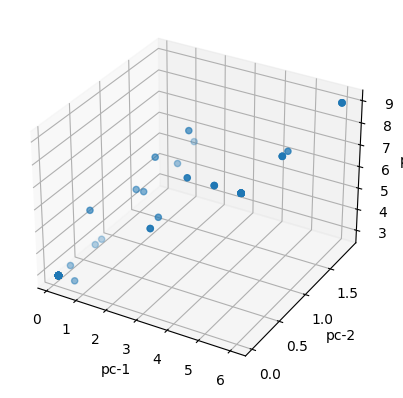

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Function to update the 3D plot for each iteration
def update(frame):
    ax.cla()  # Clear the previous frame
    
    # Replace this with your actual data for each iteration
    # Assuming store_A is a list of 3D points (x, y, z)
    points = store_poisson_large[frame]
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    #ax.set_title(f'Iteration {frame + 1}')
    ax.set_xlabel('pc-1')
    ax.set_ylabel('pc-2')
    ax.set_zlabel('pc-3')

    #ax.tight_layout()

# Create a figure and 3D axis


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the number of iterations
num_iterations = len(store_poisson_large)
print(num_iterations)
# Create an animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=1000)

# Save each frame as an image
for i in range(num_iterations):
    update(i)  # Update the plot for each iteration
    plt.savefig(f'iteration_{i + 1}.png')

plt.show()


NORMAL DISTRIBUTION

In [131]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples and features
num_samples =100
num_features = 11

# Generate random data with increased variance
variance_factor = 10
normal_data = variance_factor * np.random.randn(num_samples, num_features)

# Display the mean and variance of each feature
for i in range(num_features):
    print(f"Feature {i+1}: Mean={np.mean(normal_data[:, i]):.2f}, Variance={np.var(normal_data[:, i]):.2f}")

Feature 1: Mean=2.98, Variance=117.47
Feature 2: Mean=-0.46, Variance=84.11
Feature 3: Mean=-0.31, Variance=79.48
Feature 4: Mean=0.21, Variance=112.97
Feature 5: Mean=-0.19, Variance=82.63
Feature 6: Mean=0.34, Variance=112.62
Feature 7: Mean=0.08, Variance=78.00
Feature 8: Mean=0.47, Variance=97.82
Feature 9: Mean=-1.61, Variance=98.12
Feature 10: Mean=1.37, Variance=106.84
Feature 11: Mean=0.66, Variance=65.66


In [132]:
low_dim = pca_exponent('normal', normal_data, 3,40)
A_normal_large, V_normal_large, store_normal_large = low_dim.fit()

10


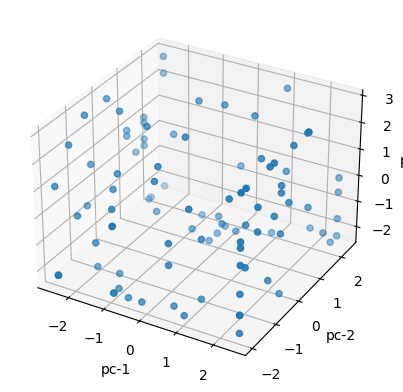

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Function to update the 3D plot for each iteration
def update(frame):
    ax.cla()  # Clear the previous frame
    
    # Replace this with your actual data for each iteration
    # Assuming store_A is a list of 3D points (x, y, z)
    points = store_normal_large[frame]
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    #ax.set_title(f'Iteration {frame + 1}')
    ax.set_xlabel('pc-1')
    ax.set_ylabel('pc-2')
    ax.set_zlabel('pc-3')

    #ax.tight_layout()

# Create a figure and 3D axis


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the number of iterations
num_iterations = len(store_normal_large)
print(num_iterations)
# Create an animation
animation = FuncAnimation(fig, update, frames=num_iterations, interval=1000)

# Save each frame as an image
for i in range(num_iterations):
    update(i)  # Update the plot for each iteration
    plt.savefig(f'iteration_{i + 1}.png')

plt.show()
